# 3.7 Exercises

### Conceptual

1.  
Reviewing TV's p-value  
$H_0:$ TV advertising units sold does not have a relationship with Sales...  
and so on and so forth for radio and newspaper

Given that the p-value for TV and radio is less than 0.05, we can reject the null hypothesis that there is no relationship

Given that the p-value for newspaper is greater than our alpha 0.05, we cannot reject the null and we state that there is no statistical evidence that newspaper ad units sold has a relationship with Sales

2.  KNN regression takes that K nearest neighbors values and averages them to estimate f(x)
KNN classifier works similarly in that it works to make its estimate from the set $N_0$ consisting of K nearest neighbors.  The estimate in this case howerver, it estimating the conditional probability for class j as a fraction of the points in $N_0$.  It then applies Bayes rule and classifies the test observation $x_0$ to the class with the largest probability

3. 
X1:Gpa  
X2: IQ  
X3: Gender (1=female; 0=male)  
Y = starting salary after graduation

$\hat{Y} = 50 + 20X_1 + 0.07X_2 + 35X_3 + 0.01X_1X_2 - 10X_1X_3$  


3ai. false
3aii. True
3aiii. 

### Applied

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#8a.
auto = pd.read_csv('Auto.csv')
auto = auto.loc[~auto.horsepower.isin(['?']),:]
auto['horsepower'] = pd.to_numeric(auto.horsepower)
model = sm.OLS.from_formula('mpg~horsepower', data=auto)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           7.03e-81
Time:                        11:00:23   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

8ai. F-factor indicates that we should reject the null hypothesis that there is no relationship.  
8aii. the relationship is reasonably strong.  61% of the variance is explained by the model.  
8aiii.  the relationship is negative, so mpg decreases as horspower increases


In [3]:
predictDF = pd.DataFrame({'horsepower':[9]})

In [4]:
#8aiv
predictions = results.get_prediction(predictDF)
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,38.515258,0.663361,37.211048,39.819469,28.782441,48.248076


<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

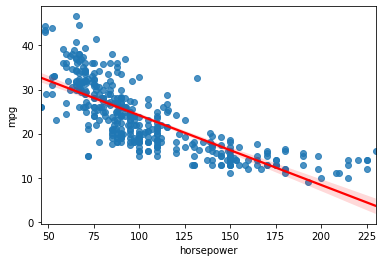

In [5]:
#8b
sns.regplot(x='horsepower', y='mpg', data = auto, line_kws={'color':'red'})

<AxesSubplot:>

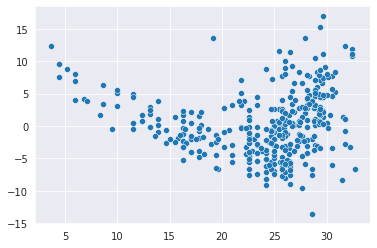

In [6]:
#8c
#plotting residuals against fitted values
sns.set_style('darkgrid')
sns.scatterplot(x=results.fittedvalues, y=results.resid)

data above is nonlinear and also potentially heteroscedastic

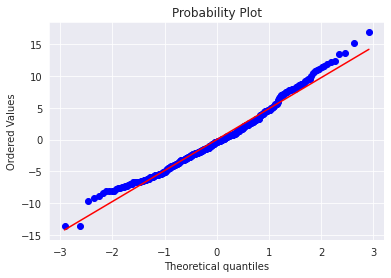

In [7]:
#plotting QQ plot
import scipy
scipy.stats.probplot(results.resid, dist='norm', plot =plt)
plt.show()

residuals are fairly normal though

<AxesSubplot:ylabel='S. Residuals'>

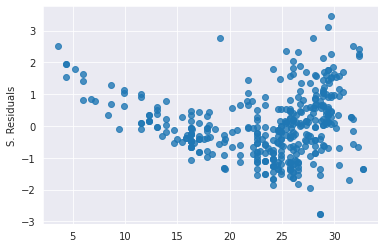

In [8]:
s_residuals = pd.Series(results.resid_pearson, name="S. Residuals")
sns.regplot(x=results.fittedvalues, y=s_residuals,  fit_reg=False)

In [9]:
import statsmodels.stats.outliers_influence as oi
infl = oi.OLSInfluence(results)

In [10]:
inDF = infl.summary_frame()

<AxesSubplot:xlabel='hat_diag', ylabel='student_resid'>

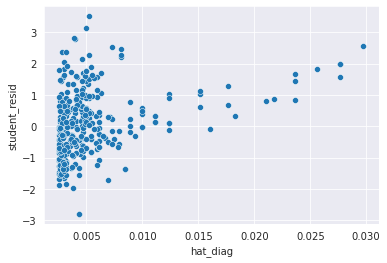

In [11]:
sns.scatterplot(x='hat_diag', y='student_resid', data=inDF)

we might have a couple of outliers as evidenced by a couple of points with studentized residuals about 3.  our hat statistic is 0.005102 which we have quite a lot of

In [12]:
(2/392)*3

0.015306122448979591

In [35]:
#outliers in data
condition = inDF['student_resid'] > np.abs(3)
outliers = inDF.loc[condition,:]
outliers

,dfb_Intercept,dfb_horsepower,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
322,0.232568,-0.182431,0.031512,3.458909,0.005240,0.251047,3.508709,0.254661
329,0.200955,-0.155444,0.024244,3.114256,0.004975,0.220199,3.149671,0.222703


In [36]:
outliers.index

Int64Index([322, 329], dtype='int64')

In [37]:
auto_indexReset = auto.reset_index(drop=True)

In [44]:
auto.loc[outliers.index,:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc
329,44.6,4,91.0,67,1850,13.8,80,3,honda civic 1500 gl


In [41]:
results.resid[322]

16.92404664681701

In [45]:
results.fittedvalues[322]

29.67595335318299

In [50]:
results.resid.describe()

count    3.920000e+02
mean    -1.296922e-14
std      4.899480e+00
min     -1.357104e+01
25%     -3.259151e+00
50%     -3.435430e-01
75%      2.763033e+00
max      1.692405e+01
dtype: float64

In [17]:
inDF

,dfb_Intercept,dfb_horsepower,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.004062,-0.009707,0.000154,-0.289182,0.003676,-0.017566,-0.288842,-0.017545
1,-0.013024,0.018109,0.000231,0.226973,0.008876,0.021479,0.226696,0.021453
2,-0.013802,0.021335,0.000391,0.355951,0.006130,0.027954,0.355552,0.027922
3,0.002054,-0.003176,0.000009,-0.052989,0.006130,-0.004161,-0.052921,-0.004156
4,0.004518,-0.007998,0.000070,-0.171143,0.004730,-0.011799,-0.170930,-0.011784
...,...,...,...,...,...,...,...,...
392,0.005246,-0.003166,0.000027,0.130416,0.003140,0.007319,0.130252,0.007310
393,0.208413,-0.174917,0.023189,2.510749,0.007303,0.215357,2.528043,0.216840
394,0.046476,-0.029285,0.001940,1.086852,0.003274,0.062293,1.087106,0.062308
395,0.005329,-0.003650,0.000022,0.109026,0.003671,0.006618,0.108888,0.006609


In [18]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [19]:
results.fittedvalues[324]

29.67595335318299

In [20]:
results.fittedvalues[332]

30.14948755324395

In [21]:
results.resid[324]

11.124046646817007

In [22]:
results.resid[332]

-0.3494875532439501

Problem 9

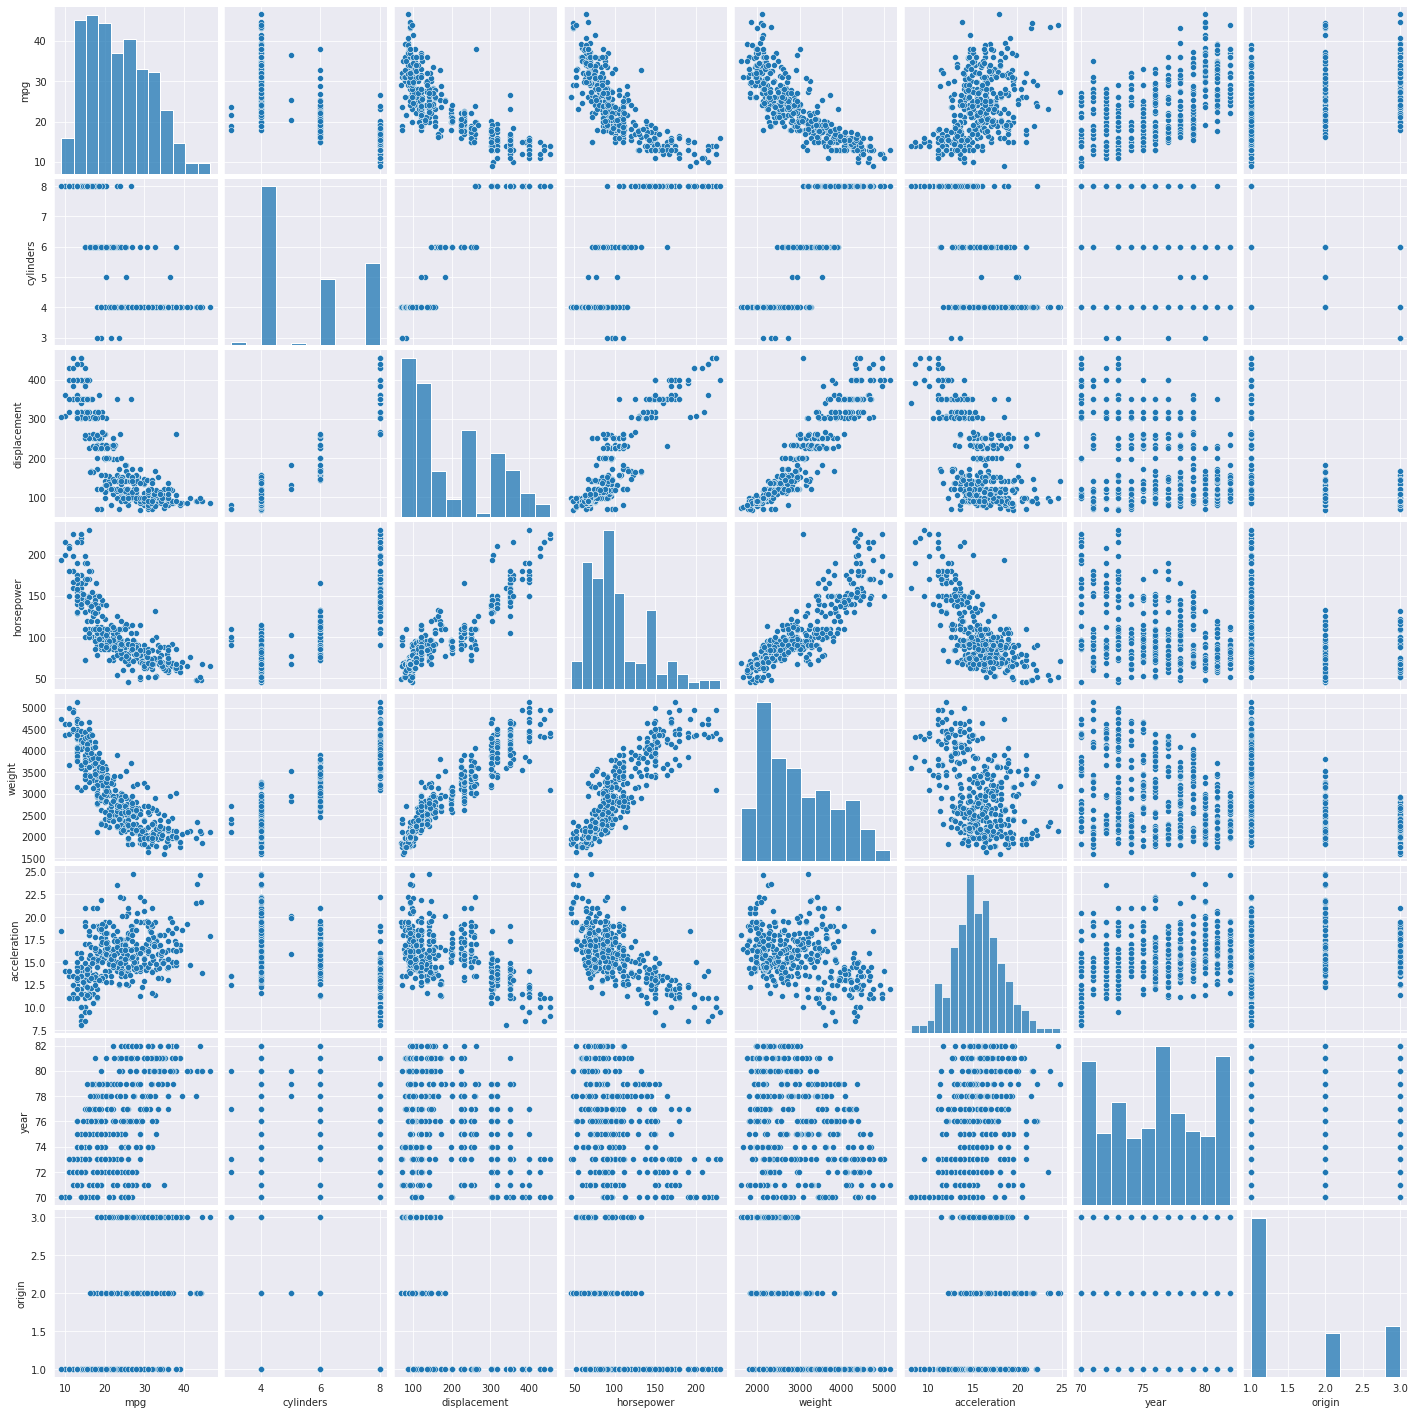

In [23]:
#9a
sns.pairplot(auto)

In [24]:
#9b
ivsList = list(auto.columns)
ivsList.remove('mpg')
ivsList.remove('name')
corDF = auto.loc[:,ivsList]
corDF.corr()

,cylinders,displacement,horsepower,weight,acceleration,year,origin
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [61]:
#9c
allIVs = '+'.join(ivsList)
my_formula = 'mpg ~ ' + allIVs
model2 = sm.OLS.from_formula(my_formula, data = auto)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 19 Oct 2020   Prob (F-statistic):          2.04e-139
Time:                        11:35:11   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

9ci. yes there is  
9cii. displacement, weight, year, origin  
9ciii. the coefficient for year suggests that, holding other variables constant, for every year, mpg increases 0.751 on average

<AxesSubplot:>

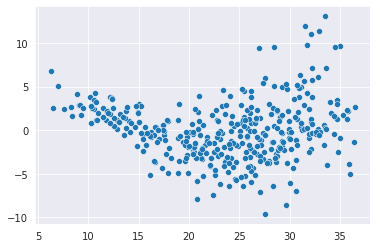

In [26]:
#plotting residuals against fitted values
sns.scatterplot(x=results2.fittedvalues, y=results2.resid, data=auto)

looks like there is some nonlinearity and perhaps some heteroscedacisticity as well

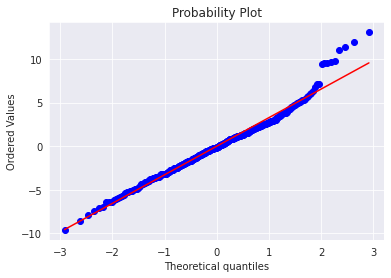

In [27]:
#plotting QQ plot
import scipy
scipy.stats.probplot(results2.resid, dist='norm', plot =plt)
plt.show()

residuals mostly normally distributed

In [28]:
infl2 = oi.OLSInfluence(results2)
inDF2 = infl2.summary_frame()
inDF2.columns

Index(['dfb_Intercept', 'dfb_cylinders', 'dfb_displacement', 'dfb_horsepower',
       'dfb_weight', 'dfb_acceleration', 'dfb_year', 'dfb_origin', 'cooks_d',
       'standard_resid', 'hat_diag', 'dffits_internal', 'student_resid',
       'dffits'],
      dtype='object')

<AxesSubplot:ylabel='student_resid'>

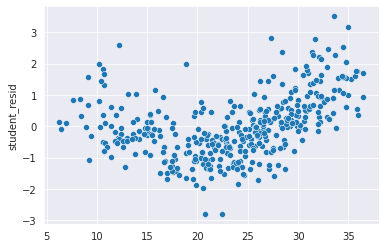

In [29]:
#looking at heteroscedacisticity, not much
sns.scatterplot(x= results2.fittedvalues, y = inDF.student_resid)

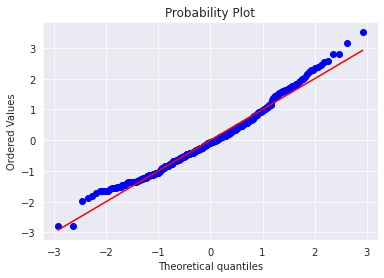

In [30]:
scipy.stats.probplot(inDF.student_resid, dist='norm', plot =plt)
plt.show()

<AxesSubplot:xlabel='hat_diag', ylabel='student_resid'>

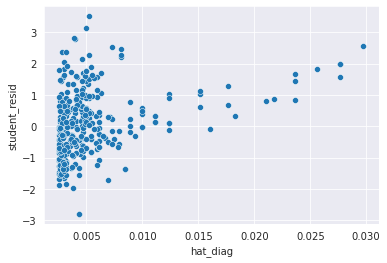

In [31]:
sns.scatterplot(y=inDF.student_resid, x=inDF.hat_diag)

In [32]:
(8/392)*3

0.061224489795918366

looks like there are a couple outliers but no high leverage points

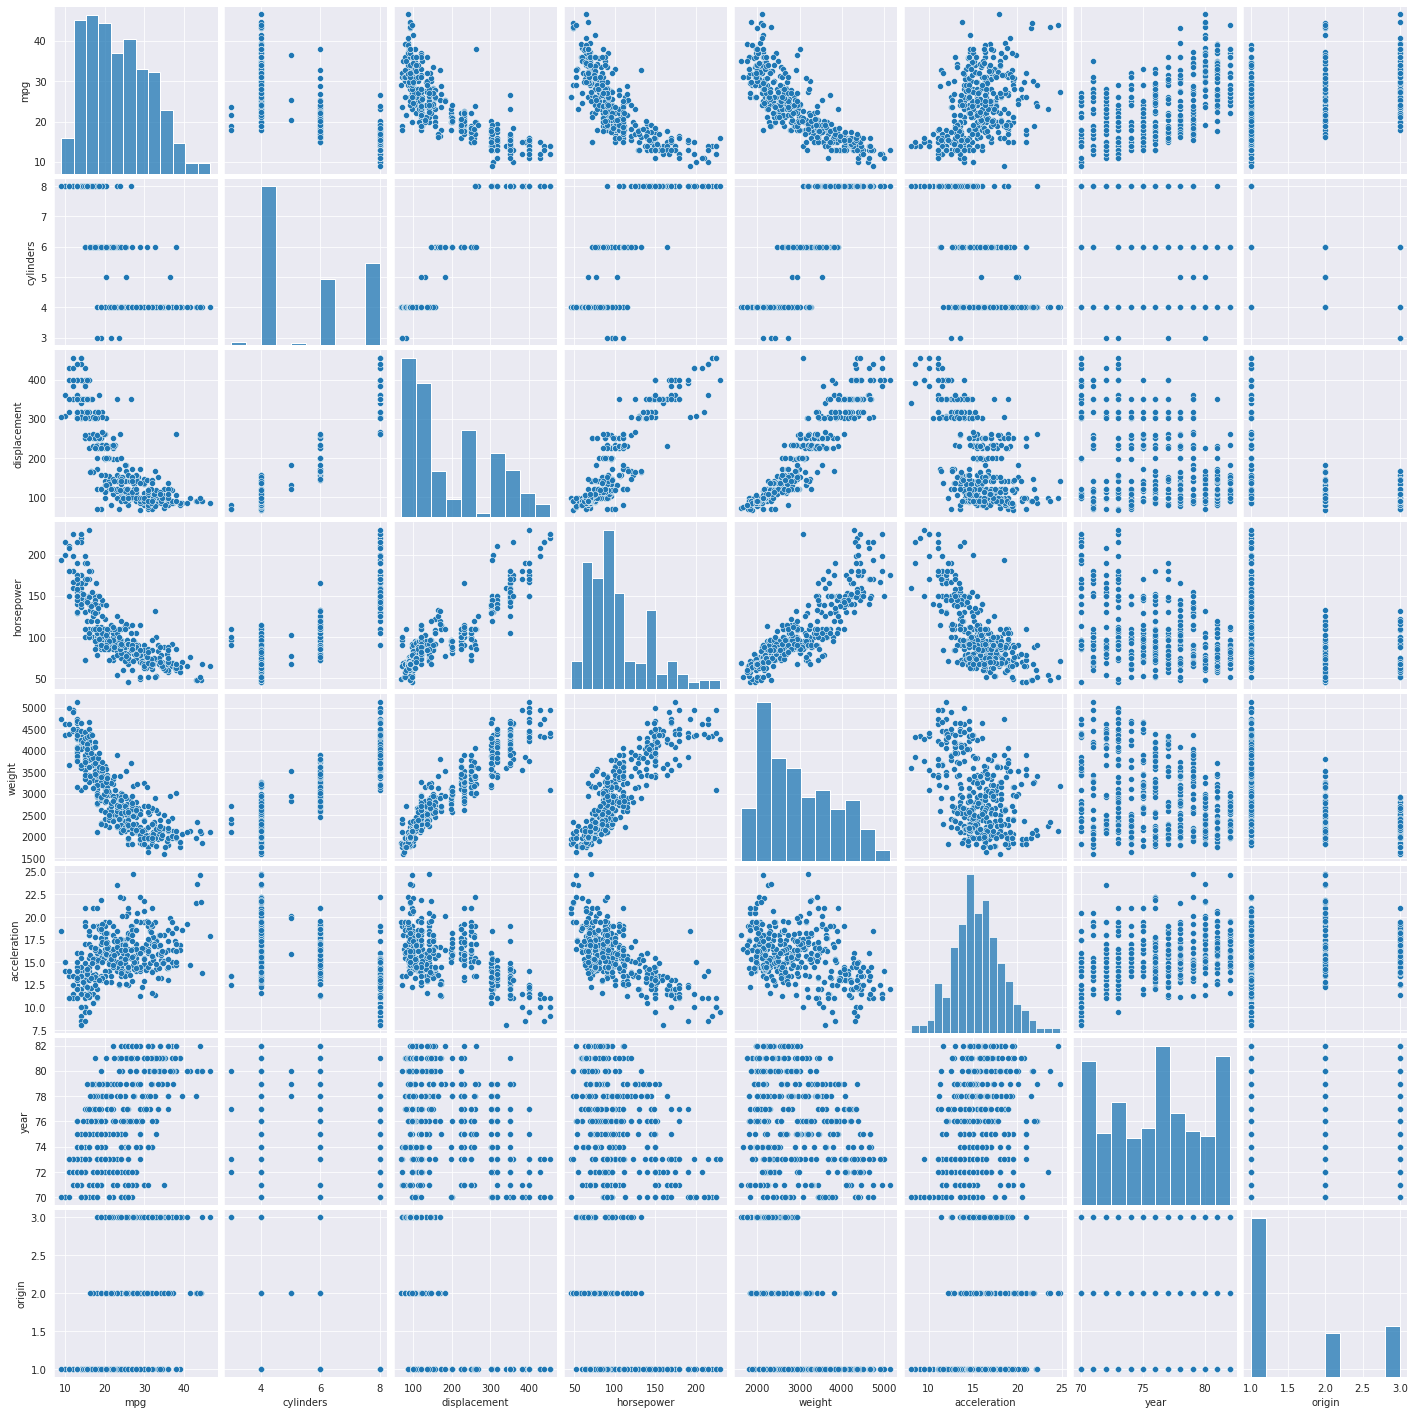

In [33]:
#9e
sns.pairplot(auto)

In [54]:
for i in auto.columns:
    print(i)

mpg
cylinders
displacement
horsepower
weight
acceleration
year
origin
name


In [56]:
#cylinder*displacement
intModel1 = sm.OLS.from_formula('mpg ~ cylinders*displacement', data = auto)
results1 = intModel1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     271.0
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           8.35e-95
Time:                        11:31:44   Log-Likelihood:                -1139.7
No. Observations:                 392   AIC:                             2287.
Df Residuals:                     388   BIC:                             2303.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 48.2204      2.347     20.545      0.000      43.606      52.835
cylinders                 -2.4184      0.535     -4.524      0.000      -3.469      -1.367
displacement              -0.1344      0.016     -8.321      0.000      -0.166      -0.103
cylinders:displacement     0.0118      0.002      5.711      0.000       0.008       0.016
==============================================================================
Omnibus:                       42.283   Durbin-Watson:                   0.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.047
Skew:                           0.524   Prob(JB):                     3.45e-24
Kurtosis:                       5.349   Cond. No.                     1.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**cylinders and displacement have an interaction effect!**

In [57]:
#horsepower*weight
intModel2 = sm.OLS.from_formula('mpg ~ horsepower*weight', data = auto)
results2 = intModel2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     384.8
Date:                Mon, 19 Oct 2020   Prob (F-statistic):          7.26e-116
Time:                        11:31:52   Log-Likelihood:                -1090.7
No. Observations:                 392   AIC:                             2189.
Df Residuals:                     388   BIC:                             2205.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            63.5579      2.343     27.127      0.000      58.951      68.164
horsepower           -0.2508      0.027     -9.195      0.000      -0.304      -0.197
weight               -0.0108      0.001    -13.921      0.000      -0.012      -0.009
horsepower:weight  5.355e-05   6.65e-06      8.054      0.000    4.05e-05    6.66e-05
==============================================================================
Omnibus:                       34.175   Durbin-Watson:                   0.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.522
Skew:                           0.577   Prob(JB):                     1.45e-12
Kurtosis:                       4.417   Cond. No.                     4.77e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**horsepower and weight also have interaction**

In [62]:
## what if we added these interactions to the model
my_formula += '+ cylinders:displacement + horsepower:weight'
modelIntAll = sm.OLS.from_formula(my_formula, data = auto)
resultsIntAll = modelIntAll.fit()
resultsIntAll.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 19 Oct 2020   Prob (F-statistic):          6.52e-159
Time:                        11:35:18   Log-Likelihood:                -971.56
No. Observations:                 392   AIC:                             1963.
Df Residuals:                     382   BIC:                             2003.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.0528      4.544      0.892      0.373      -4.881      12.986
cylinders                 -0.7357      0.483     -1.522      0.129      -1.686       0.215
displacement              -0.0201      0.016     -1.269      0.205      -0.051       0.011
horsepower                -0.2080      0.027     -7.754      0.000      -0.261      -0.155
weight                    -0.0101      0.001    -10.849      0.000      -0.012      -0.008
acceleration              -0.0706      0.089     -0.793      0.428      -0.245       0.104
year                       0.7692      0.045     17.168      0.000       0.681       0.857
origin                     0.7159      0.259      2.765      0.006       0.207       1.225
cylinders:displacement     0.0039      0.002      1.816      0.070      -0.000       0.008
horsepower:weight       4.699e-05   6.93e-06      6.781      0.000    3.34e-05    6.06e-05
==============================================================================
Omnibus:                       41.771   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.626
Skew:                           0.609   Prob(JB):                     1.88e-18
Kurtosis:                       4.875   Cond. No.                     1.24e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
#9f
modelDisplace = sm.OLS.from_formula('mpg ~ np.square(displacement)', data = auto)
resultsDisplace = modelDisplace.fit()
resultsDisplace.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     508.7
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           1.08e-72
Time:                        11:44:26   Log-Likelihood:                -1197.6
No. Observations:                 392   AIC:                             2399.
Df Residuals:                     390   BIC:                             2407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  29.2577      0.366     79.923      0.000      28.538      29.977
np.square(displacement)    -0.0001   5.29e-06    -22.554      0.000      -0.000      -0.000
==============================================================================
Omnibus:                       38.414   Durbin-Watson:                   0.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.066
Skew:                           0.792   Prob(JB):                     6.02e-11
Kurtosis:                       3.610   Cond. No.                     9.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
modelDisplace = sm.OLS.from_formula('mpg ~ np.sqrt(displacement)', data = auto)
resultsDisplace = modelDisplace.fit()
resultsDisplace.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     808.5
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           4.13e-97
Time:                        11:45:30   Log-Likelihood:                -1141.2
No. Observations:                 392   AIC:                             2286.
Df Residuals:                     390   BIC:                             2294.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                47.1184      0.862     54.632      0.000      45.423      48.814
np.sqrt(displacement)    -1.7588      0.062    -28.434      0.000      -1.880      -1.637
==============================================================================
Omnibus:                       41.554   Durbin-Watson:                   0.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.037
Skew:                           0.625   Prob(JB):                     1.87e-17
Kurtosis:                       4.777   Cond. No.                         53.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
modelDisplace = sm.OLS.from_formula('mpg ~ np.power(displacement,3)', data = auto)
resultsDisplace = modelDisplace.fit()
resultsDisplace.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     346.3
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           8.96e-56
Time:                        11:45:52   Log-Likelihood:                -1236.6
No. Observations:                 392   AIC:                             2477.
Df Residuals:                     390   BIC:                             2485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    27.3060      0.354     77.062      0.000      26.609      28.003
np.power(displacement, 3) -2.659e-07   1.43e-08    -18.609      0.000   -2.94e-07   -2.38e-07
==============================================================================
Omnibus:                       34.327   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.099
Skew:                           0.785   Prob(JB):                     1.19e-09
Kurtosis:                       3.227   Cond. No.                     3.06e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
modelDisplace = sm.OLS.from_formula('mpg ~ np.log(displacement)', data = auto)
resultsDisplace = modelDisplace.fit()
resultsDisplace.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     853.4
Date:                Mon, 19 Oct 2020   Prob (F-statistic):          3.15e-100
Time:                        11:46:03   Log-Likelihood:                -1133.9
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     390   BIC:                             2280.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               85.6906      2.142     40.001      0.000      81.479      89.902
np.log(displacement)   -12.1385      0.416    -29.212      0.000     -12.955     -11.322
==============================================================================
Omnibus:                       40.229   Durbin-Watson:                   0.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.126
Skew:                           0.516   Prob(JB):                     8.12e-22
Kurtosis:                       5.209   Cond. No.                         51.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""